## Exercise 4:

Now consider a bidimensional function:

$$U(\vec{r}) = U(x, y) = \sin(x)\cos(y) + \frac{2(xy)^2}{1000}$$

The function has multiple local minima. The 3D visualization of the steps in this case can be difficult to interpret. Therefore, to track the evolution of the algorithm, make two plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def funcao(x, y):
    return np.sin(x)*np.cos(y) + (2*(x*y)**2)/1000

# To avoid divergence of the function, we will multiply by a Gaussian to smooth it
def gaussiana(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    return np.exp(-((x - x0)**2 / (2*sigma_x**2) + -((y - y0)**2 / (2*sigma_y**2))))

def funcao_suavizada(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    return funcao(x, y) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)

def df_dx(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    gauss = gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    funcao_dx = np.cos(x)*np.cos(y) + (4*x*y**2)/1000
    deriv_gauss_dx = -(x - x0)/(sigma_x**2) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    return funcao_dx * gauss + funcao(x, y) * deriv_gauss_dx

def df_dy(x, y, x0, y0, sigma_x=1.0, sigma_y=1.0):
    gauss = gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    funcao_dy = -np.sin(x)*np.sin(y) + (4*x**2*y)/1000
    deriv_gauss_dy = -(y - y0)/(sigma_y**2) * gaussiana(x, y, x0, y0, sigma_x, sigma_y)
    return funcao_dy * gauss + funcao(x, y) * deriv_gauss_dy

In [2]:
def grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y, epsilon=0.01):
    x, y = x_0, y_0
    x_list = [x]
    y_list = [y]
    U = [funcao_suavizada(x, y, x_0, y_0, sigma_x, sigma_y)]

    for _ in range(itera):
        grad_x = df_dx(x, y, x_0, y_0, sigma_x, sigma_y)
        grad_y = df_dy(x, y, x_0, y_0, sigma_x, sigma_y)

        x_i = x_0 - alpha * grad_x
        y_i = y_0 - alpha * grad_y

        x_list.append(x_i)
        y_list.append(y_i)
        U.append(funcao_suavizada(x_i, y_i, x_0, y_0, sigma_x, sigma_y))

        delta = np.sqrt((x_i - x)**2 + (y_i - y)**2)
        
        if abs(delta) < epsilon:
            break

        x , y = x_i, y_i

    return np.array(x_list), np.array(y_list), np.array(U)

 
### a. A contour plot (use plt.imshow or plt.pcolormesh) of the function $U(x,y)$ and draw the trajectory of the particle on the plot.

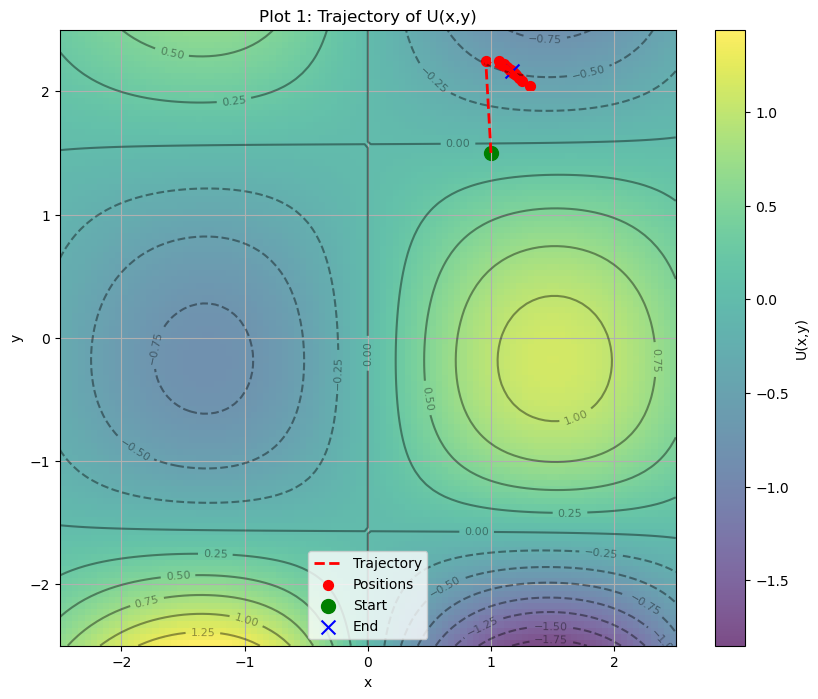

In [3]:
x_0 = 1
y_0 = 1.5
alpha = 0.9
itera = 1000
epsilon = 0.01
sigma_x, sigma_y = 3, 3

x_list, y_list, U_list = grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y)

x_vals = np.linspace(-2.5, 2.5, 100)
y_vals = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcao_suavizada(X, Y, x_0, y_0, sigma_x, sigma_y)

plt.figure(figsize=(10, 8))
plt.imshow(Z, 
           extent=[-2.5, 2.5, -2.5, 2.5], 
           origin='lower', 
           cmap='viridis', 
           alpha=0.7)
plt.colorbar(label='U(x,y)')

contours = plt.contour(X, Y, Z, levels=15, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8)

# Particle trajectory
plt.plot(x_list, y_list, '--', color = 'red', linewidth=2, label='Trajectory')
plt.scatter(x_list, y_list, c='red', s=50, label='Positions')

plt.scatter(x_list[0], y_list[0], c='green', s=100, label='Start', marker='o')
plt.scatter(x_list[-1], y_list[-1], c='blue', s=100, label='End', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 1: Trajectory of U(x,y)')
plt.legend()
plt.grid(True)
plt.show()

Regions with warm colors such as yellow, for example, are regions with high values of the function, while regions with cool colors such as blue are regions with lower values of the function (minimum regions). Very close lines on the graph indicate a high gradient, while more distant lines indicate a weak gradient. However, the dashed lines on the map represent negative values of the function and the solid lines represent positive values.

Considering the parameters chosen for the graph generated above, we can see that GD converges to a minimum region, as expected. The trajectory shows oscillations caused by the chosen value of $\alpha$.

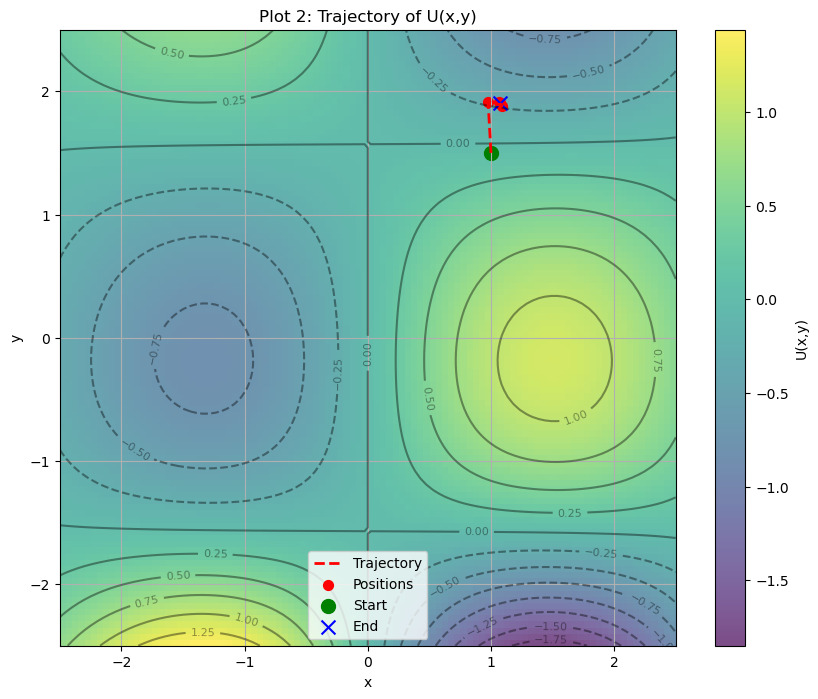

In [4]:
x_0 = 1
y_0 = 1.5
alpha = 0.5
itera = 1000
epsilon = 0.01
sigma_x, sigma_y = 3, 3

x_list, y_list, U_list = grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y)

x_vals = np.linspace(-2.5, 2.5, 100)
y_vals = np.linspace(-2.5, 2.5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = funcao_suavizada(X, Y, x_0, y_0, sigma_x, sigma_y)

plt.figure(figsize=(10, 8))
plt.imshow(Z, 
           extent=[-2.5, 2.5, -2.5, 2.5], 
           origin='lower', 
           cmap='viridis', 
           alpha=0.7)
plt.colorbar(label='U(x,y)')

contours = plt.contour(X, Y, Z, levels=15, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8)

plt.plot(x_list, y_list, '--', color = 'red', linewidth=2, label='Trajectory')
plt.scatter(x_list, y_list, c='red', s=50, label='Positions')

plt.scatter(x_list[0], y_list[0], c='green', s=100, label='Start', marker='o')
plt.scatter(x_list[-1], y_list[-1], c='blue', s=100, label='End', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 2: Trajectory of U(x,y)')
plt.legend()
plt.grid(True)
plt.show()

Keeping the initial points ($x_0$ and $y_0$) and decreasing the learning rate, we can see in the graph above that the oscillations have decreased. This indicates that increasing $\alpha$ tends to produce trajectories with more oscillations, something we have already observed in previous exercises.

### b. Make a plot of the value of $U(x_{n}, y_{n})$ at each step as a function of the iterations (steps) $n$. In the context of neural networks, we call these steps epochs.

In [5]:
def grad_desc(x_0, y_0, alpha, itera, sigma_x=1.0, sigma_y=1.0, epsilon=0.01):
    x, y = x_0, y_0
    x_list = [x]
    y_list = [y]
    U = [funcao_suavizada(x, y, x_0, y_0, sigma_x, sigma_y)]

    for _ in range(itera):
        grad_x = df_dx(x, y, x_0, y_0, sigma_x, sigma_y)
        grad_y = df_dy(x, y, x_0, y_0, sigma_x, sigma_y)

        x_i = x_0 - alpha * grad_x
        y_i = y_0 - alpha * grad_y

        x_list.append(x_i)
        y_list.append(y_i)
        U.append(funcao_suavizada(x_i, y_i, x_0, y_0, sigma_x, sigma_y))

        delta = np.sqrt((x_i - x)**2 + (y_i - y)**2)
        
        if abs(delta) < epsilon:
            break

        x , y = x_i, y_i

    return np.array(x_list), np.array(y_list), np.array(U)

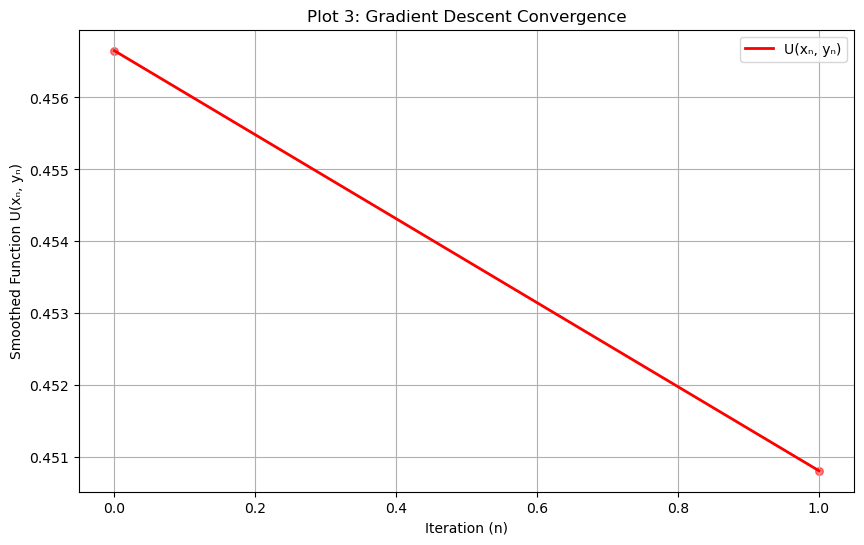

In [6]:
x_0, y_0 = 1, 1
alpha = 0.01
sigma_x, sigma_y = 2.5, 2.5
itera = 1000

x_list, y_list, U = grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y)

plt.figure(figsize=(10, 6))
plt.plot(U, 'r-', linewidth=2, label='U(xₙ, yₙ)')
plt.scatter(range(len(U)), U, c='red', s=30, alpha=0.5)
plt.xlabel('Iteration (n)')
plt.ylabel('Smoothed Function U(xₙ, yₙ)')
plt.title('Plot 3: Gradient Descent Convergence')
plt.legend()
plt.grid(True)
plt.show()

With the small value of $\alpha$ ($0.01$), there are no oscillations and the graph above shows that convergence to the minimum is happening smoothly.

### Vary the initial position $(x_{0},y_{0})$ and the learning rate $\alpha$ and see how this affects the convergence of the algorithm.

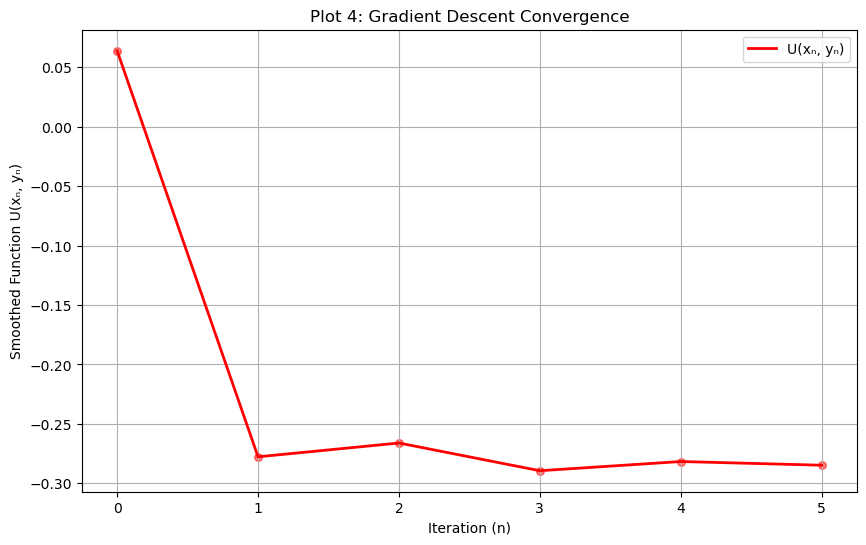

In [7]:
x_0, y_0 = 1, 1.5
alpha = 0.5
sigma_x, sigma_y = 2.5, 2.5
itera = 1000

x_list, y_list, U = grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y)

plt.figure(figsize=(10, 6))
plt.plot(U, 'r-', linewidth=2, label='U(xₙ, yₙ)')
plt.scatter(range(len(U)), U, c='red', s=30, alpha=0.5)
plt.xlabel('Iteration (n)')
plt.ylabel('Smoothed Function U(xₙ, yₙ)')
plt.title('Plot 4: Gradient Descent Convergence')
plt.legend()
plt.grid(True)
plt.show()

We can see that with the increase in the learning rate and the initial point, there is some oscillation in the convergence trajectory of GD. The number of iterations also increases with these changes, and GD reaches another value close to the minimum of the function.

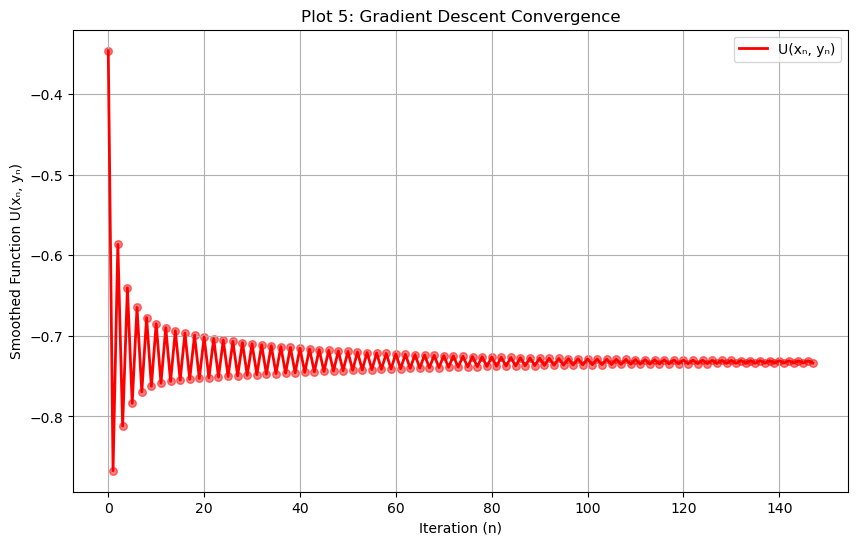

In [8]:
x_0, y_0 = 2, 2
alpha = 0.9
sigma_x, sigma_y = 2.5, 2.5
itera = 1000

x_list, y_list, U = grad_desc(x_0, y_0, alpha, itera, sigma_x, sigma_y)

plt.figure(figsize=(10, 6))
plt.plot(U, 'r-', linewidth=2, label='U(xₙ, yₙ)')
plt.scatter(range(len(U)), U, c='red', s=30, alpha=0.5)
plt.xlabel('Iteration (n)')
plt.ylabel('Smoothed Function U(xₙ, yₙ)')
plt.title('Plot 5: Gradient Descent Convergence')
plt.legend()
plt.grid(True)
plt.show()

Increasing both the learning rate and the initial position, we observe a significant difference in the convergence of GD. The number of iterations is more than 140 times higher compared to the first plot, and the oscillation of GD steps is extremely high, indicating that a learning rate of $0.9$ is too high for this problem.

### What happens if you greatly increase the learning rate? And if you decrease it a lot? Can you reach the global minimum?

Increasing the learning rate too much causes the GD steps to oscillate greatly when searching for the function's minimum, which shows an imprecision in the model. Decreasing the learning rate too much, GD tends towards the minimum value of the function more smoothly, but it is not able to find the minimum value of the function with such a small $\alpha$. In plot 4, using $x_0 = 1$, $y_0 = 1.5$ and $\alpha = 0.5$, we are able to get close to the minimum value of the function ($-0.25$), as we also showed in plot 2 above.